In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestRegressor

In [1]:
# Download MCD stock data from Yahoo Finance
ticker = "MCD"
data = yf.download(ticker, start="2018-01-01", end="2024-01-01")

NameError: name 'yf' is not defined

In [ ]:
# Display the first few rows of the dataset
print(data.head())

Price                       Adj Close       Close        High         Low  \
Ticker                            MCD         MCD         MCD         MCD   
Date                                                                        
2018-01-02 00:00:00+00:00  147.811966  173.220001  174.479996  172.660004   
2018-01-03 00:00:00+00:00  147.188980  172.490005  173.639999  172.000000   
2018-01-04 00:00:00+00:00  148.221512  173.699997  174.130005  172.729996   
2018-01-05 00:00:00+00:00  148.520172  174.050003  175.000000  173.399994   
2018-01-08 00:00:00+00:00  148.417755  173.929993  174.210007  172.929993   

Price                            Open   Volume  
Ticker                            MCD      MCD  
Date                                            
2018-01-02 00:00:00+00:00  173.729996  3696900  
2018-01-03 00:00:00+00:00  173.229996  3789600  
2018-01-04 00:00:00+00:00  173.240005  2756400  
2018-01-05 00:00:00+00:00  174.000000  3737700  
2018-01-08 00:00:00+00:00  173.740005  2

In [ ]:
data.shape

(1509, 6)

In [ ]:
mcd_df=data[['Adj Close']]
mcd_df

Price,Adj Close
Ticker,MCD
Date,
2018-01-02 00:00:00+00:00,147.811966
2018-01-03 00:00:00+00:00,147.188980
2018-01-04 00:00:00+00:00,148.221512
2018-01-05 00:00:00+00:00,148.520172
2018-01-08 00:00:00+00:00,148.417755
...,...
2023-12-22 00:00:00+00:00,286.511536
2023-12-26 00:00:00+00:00,287.650879


**Handling Missing Values,Skewness and Outliers**

In [ ]:
# Check for missing values in each column
data.isnull().sum()

,,0
Price,Ticker,
Adj Close,MCD,0
Close,MCD,0
High,MCD,0
Low,MCD,0
Open,MCD,0
Volume,MCD,0


In [ ]:
# Identifying Skewness
print('Skewness Of Adj Close: ',skew(data['Adj Close']))

Skewness Of Adj Close:  [0.12482582]


In [ ]:
# Initialising The OneClassSVM Model
one = OneClassSVM(nu = 0.1, kernel = 'rbf', gamma = 'auto')

In [ ]:
# Assuming 'x' is your feature data (e.g., x = mac_df.drop('Adj Close', axis=1))
# Define x by replacing 'mac_df' with the actual DataFrame name ('data' in this case)
x = data.drop('Adj Close', axis=1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# Assuming 'x' is your feature data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Create and fit the OCSVM model
one = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')
one.fit(x_scaled)

OneClassSVM(gamma='auto', nu=0.1)

In [ ]:
# Assuming 'x_scaled' is your scaled feature data
predictions = one.predict(x_scaled)  # Predict outlier status for x_scaled

**Data Analytics and Data Visualization**

 1.Basic Statistics

In [ ]:
data.describe()    # Summarizing The Data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MCD,MCD,MCD,MCD,MCD,MCD
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,205.018159,222.029795,223.726090,220.286395,222.029629,3.270507e+06
std,44.743022,40.144254,40.192654,40.082630,40.149108,1.562331e+06
min,123.616562,137.100006,141.710007,124.230003,135.199997,1.047700e+06
25%,167.808975,187.589996,189.419998,185.940002,188.399994,2.338200e+06
50%,197.412445,217.440002,219.470001,216.050003,217.690002,2.903300e+06
75%,241.264709,254.389999,256.390015,252.369995,254.470001,3.699900e+06
max,291.235992,298.410004,299.350006,296.299988,298.630005,1.766210e+07


2. Analyzing Stock Performance (Reflecting overall profitability):

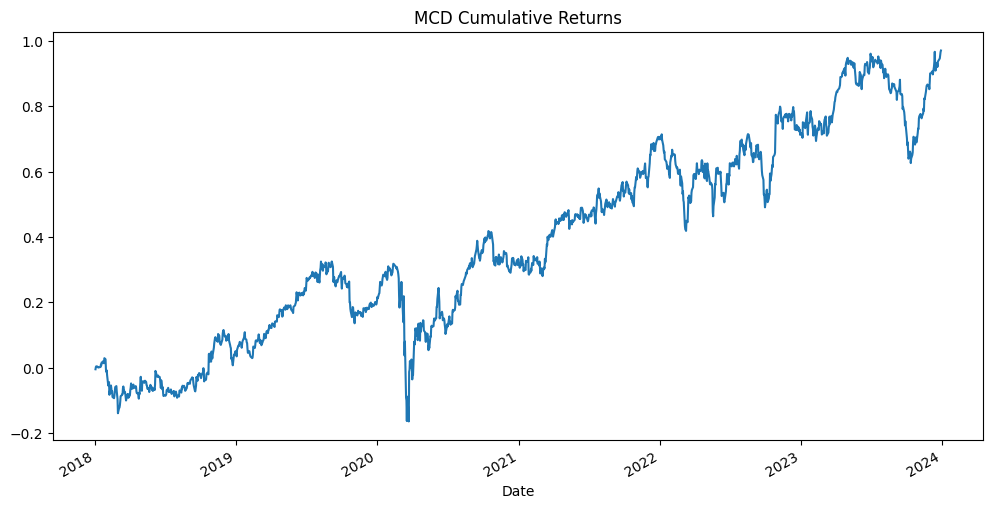

In [ ]:
# Calculate and plot the cumulative returns of MCD stock
data['Cumulative Returns'] = (1 + mcd_df['Adj Close'].pct_change()).cumprod() - 1
data['Cumulative Returns'].plot(figsize=(12, 6), title='MCD Cumulative Returns')
plt.show()

3. Exploring Volatility (Related to risk and stability):

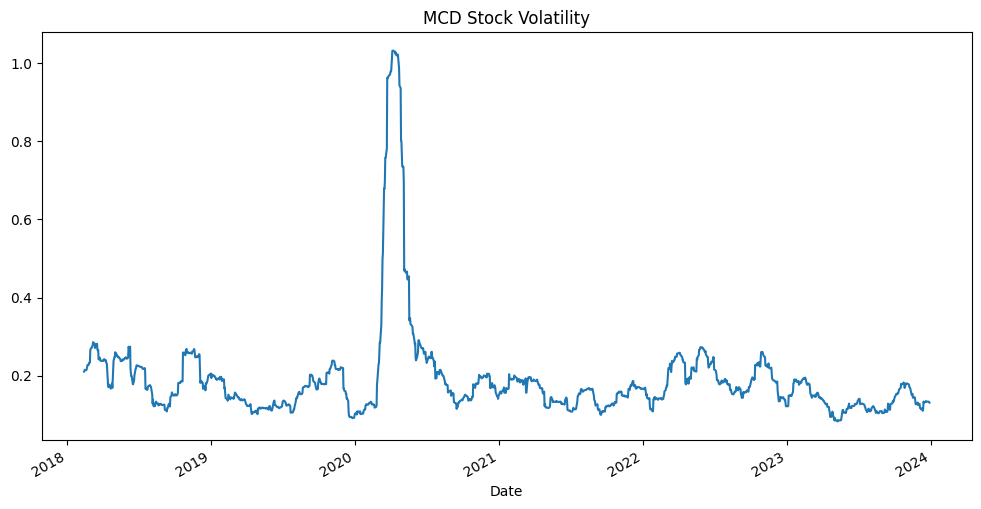

In [ ]:
# Calculate and plot the rolling volatility of MCD stock
data['Volatility'] = mcd_df['Adj Close'].pct_change().rolling(window=30).std() * np.sqrt(252)
data['Volatility'].plot(figsize=(12, 6), title='MCD Stock Volatility')
plt.show()

 4.Distribution of Adjusted Closing Price

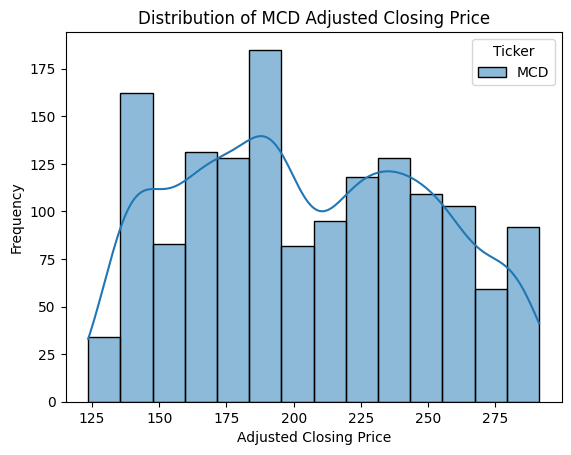

In [ ]:
sns.histplot(data['Adj Close'], kde=True)  # kde adds a kernel density estimate curve
plt.title('Distribution of MCD Adjusted Closing Price')
plt.xlabel('Adjusted Closing Price')
plt.ylabel('Frequency')
plt.show()

5.Distribution of Daily Returns

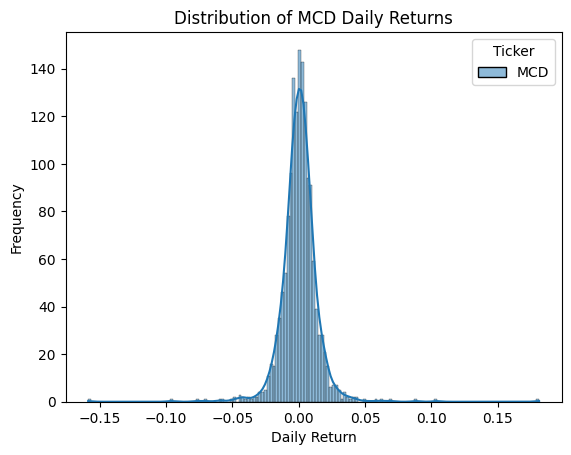

In [ ]:
daily_returns = mcd_df['Adj Close'].pct_change()
sns.histplot(daily_returns, kde=True)
plt.title('Distribution of MCD Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

6.Correlation Analysis

In [ ]:
data[['Adj Close', 'SMA_50', 'SMA_200']].corr()

Interpreting the Visualizations

Stock Price Over Time: Identify trends, patterns, and significant price movements.

Cumulative Returns: Understand the overall growth or decline of the stock.

Volatility: Assess the risk associated with the stock's price fluctuations.

Distribution: Reveals the shape of the data and potential skewness/outliers.

Distribution of Daily Returns: Understand the typical range of returns and potential outliers.

Correlation: Shows relationships between different variables (if applicable).

**Data Preprocessing and Feature Engineering**

<ipython-input-36-3a5da3e19785>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_50'] = data['Close'].rolling(window=50).mean()
<ipython-input-36-3a5da3e19785>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_200'] = data['Close'].rolling(window=200).mean()
<ipython-input-36-3a5da3e19785>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

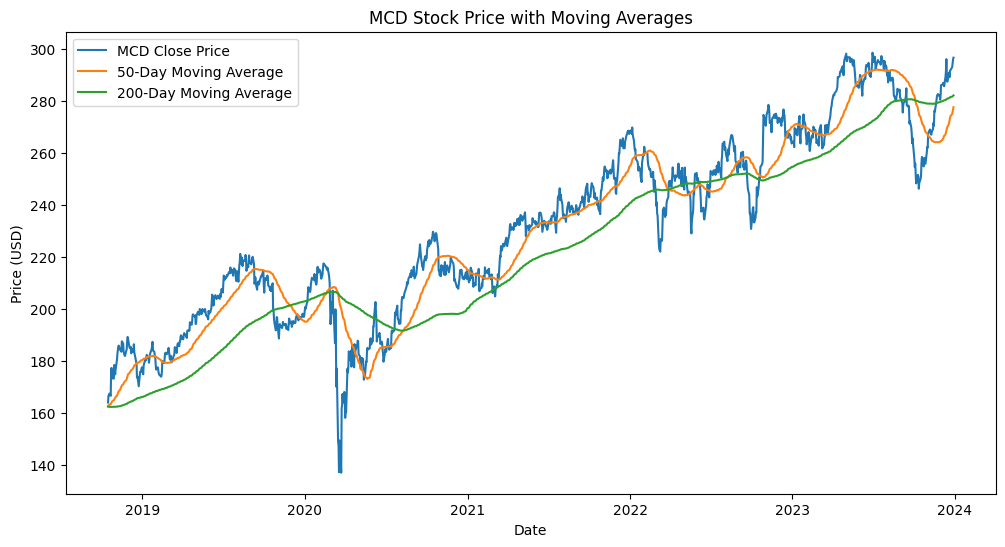

In [ ]:
# Use only the 'Close' price for prediction
data = data[['Close']]

# Create moving averages to use as features
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Drop any rows with missing values (due to the rolling window)
data.dropna(inplace=True)

# Plot the stock's closing price and the moving averages
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='MCD Close Price')
plt.plot(data['SMA_50'], label='50-Day Moving Average')
plt.plot(data['SMA_200'], label='200-Day Moving Average')
plt.title('MCD Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


**Prepare Data for Training**

In [ ]:
# Create features (X) and target (y)
X = []
y = []

# Use 30 previous days' closing price to predict the next day's closing price
for i in range(30, len(data)):
    X.append(data[['Close', 'SMA_50', 'SMA_200']].iloc[i-30:i].values.flatten())
    y.append(data['Close'].iloc[i])

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")


Training data size: (1024, 90)
Testing data size: (256, 90)


**Train Machine Learning Models**

1.Linear Regression Model

In [ ]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}")


Linear Regression - MAE: 2.05, MSE: 6.81


2.Random Forest Regressor Model

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - MAE: 11.88, MSE: 225.84


**Model Evaluation**

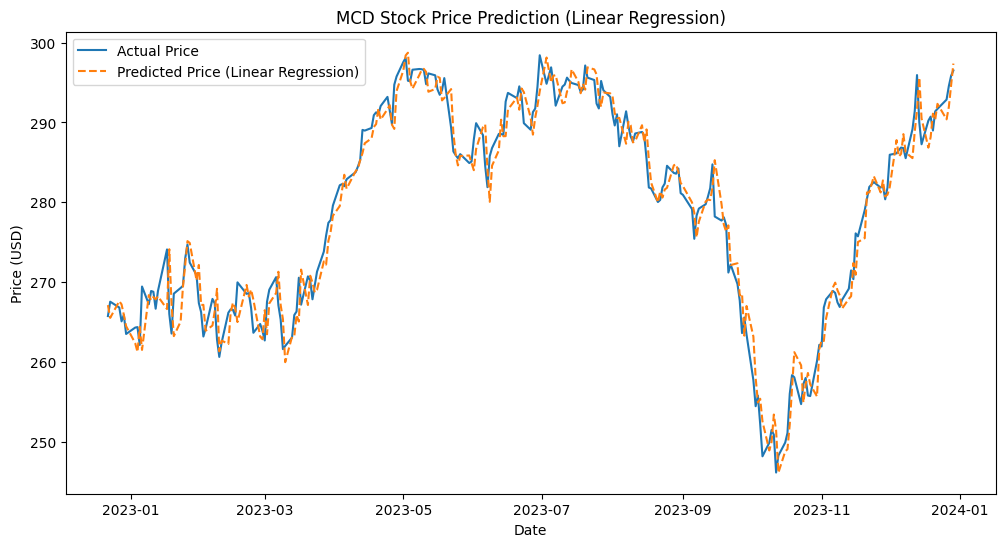

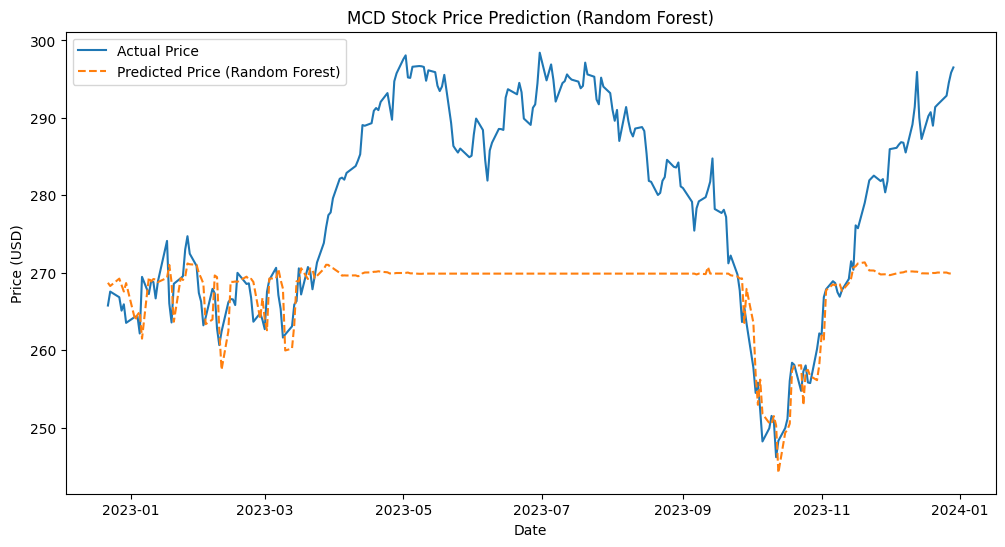

In [ ]:
# Plot Actual vs Predicted values for Linear Regression
plt.figure(figsize=(12,6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Price')
plt.plot(data.index[-len(y_test):], y_pred_lr, label='Predicted Price (Linear Regression)', linestyle='--')
plt.title("MCD Stock Price Prediction (Linear Regression)")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plot Actual vs Predicted values for Random Forest
plt.figure(figsize=(12,6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Price')
plt.plot(data.index[-len(y_test):], y_pred_rf, label='Predicted Price (Random Forest)', linestyle='--')
plt.title("MCD Stock Price Prediction (Random Forest)")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


The Linear Regression model provides a simple approach to stock price prediction but might not capture complex patterns or non-linearity in the data.

The Random Forest model, being more flexible and able to capture non-linear relationships, is likely to perform better, especially when the data exhibits intricate patterns.